In [181]:
%matplotlib notebook
import os
from matplotlib import pyplot as plt
import cv2
import skimage as sk
import numpy as np
from skimage import img_as_ubyte, img_as_int,img_as_bool
from skimage.measure import compare_ssim as ssim
from matplotlib import gridspec

#Loading images obtained with the code
img11 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\1-erosion(disk=3).jpg',as_gray='True')
img12 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\2-dilation(disk=3).jpg',as_gray='True')
img13 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\3-dilation(disk=3).jpg',as_gray='True')
img14 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\4-erosion(disk=3).jpg',as_gray='True')
img15 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\5-dilated(disk=1).jpg',as_gray='True')
img16 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\6-binary_closed(disk=1).jpg',as_gray='True')
code_skeleton = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clean_skeleton.jpg',as_gray='True')
code_aorta = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\aorta.jpg',as_gray='True')

#loading images obtained with ImageJ
img21 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clusters-Erosion.tif',as_gray='True')
img22 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clusters-Erosion-Dilation.tif',as_gray='True')
img23 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clusters-Erosion-Dilation-Dilation.tif',as_gray='True')
img24 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clusters-Erosion-Dilation-Dilation-Erosion.tif',as_gray='True')
img25 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clusters-Erosion-Dilation-Dilation-Erosion-Dilation.tif',as_gray='True')
img26 = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Clusters-Erosion-Dilation-Dilation-Erosion-Dilation-Closing.tif',as_gray='True')
ImageJ_skeleton = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\Segmentation-labeled-skeletons.tif',as_gray='True')
ImageJ_aorta = sk.io.imread(r'C:\Users\danib\Desktop\UNI\TFG\Python Codes\Fase 3\aorta.tif',as_gray='True')



In [191]:
cwd=os.getcwd()
data_path=cwd

In [183]:
#Converting float32 images to boolean images
img11b=img_as_bool(img11)
img12b=img_as_bool(img12)
img13b=img_as_bool(img13)
img14b=img_as_bool(img14)
img15b=img_as_bool(img15)
img16b=img_as_bool(img16)
code_skeletonb=img_as_bool(code_skeleton)
code_aortab=img_as_bool(code_aorta)

#Converting float32 images to boolean images
img21b=img_as_bool(img21)
img22b=img_as_bool(img22)
img23b=img_as_bool(img23)
img24b=img_as_bool(img24)
img25b=img_as_bool(img25)
img26b=img_as_bool(img26)
ImageJ_skeletonb=img_as_bool(ImageJ_skeleton)
ImageJ_aortab=img_as_bool(ImageJ_aorta)

(-0.5, 567.5, 567.5, -0.5)

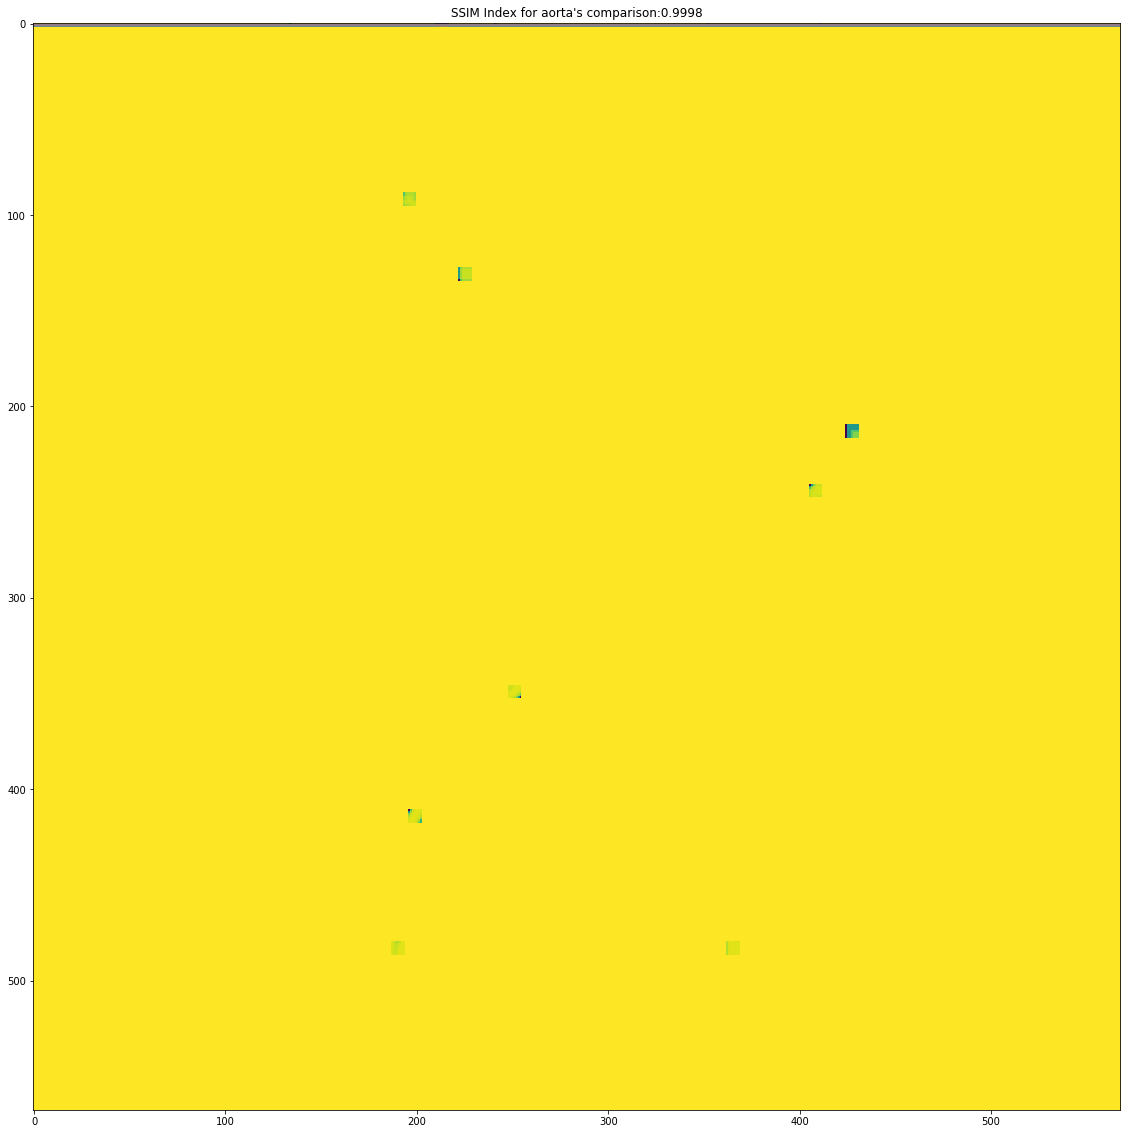

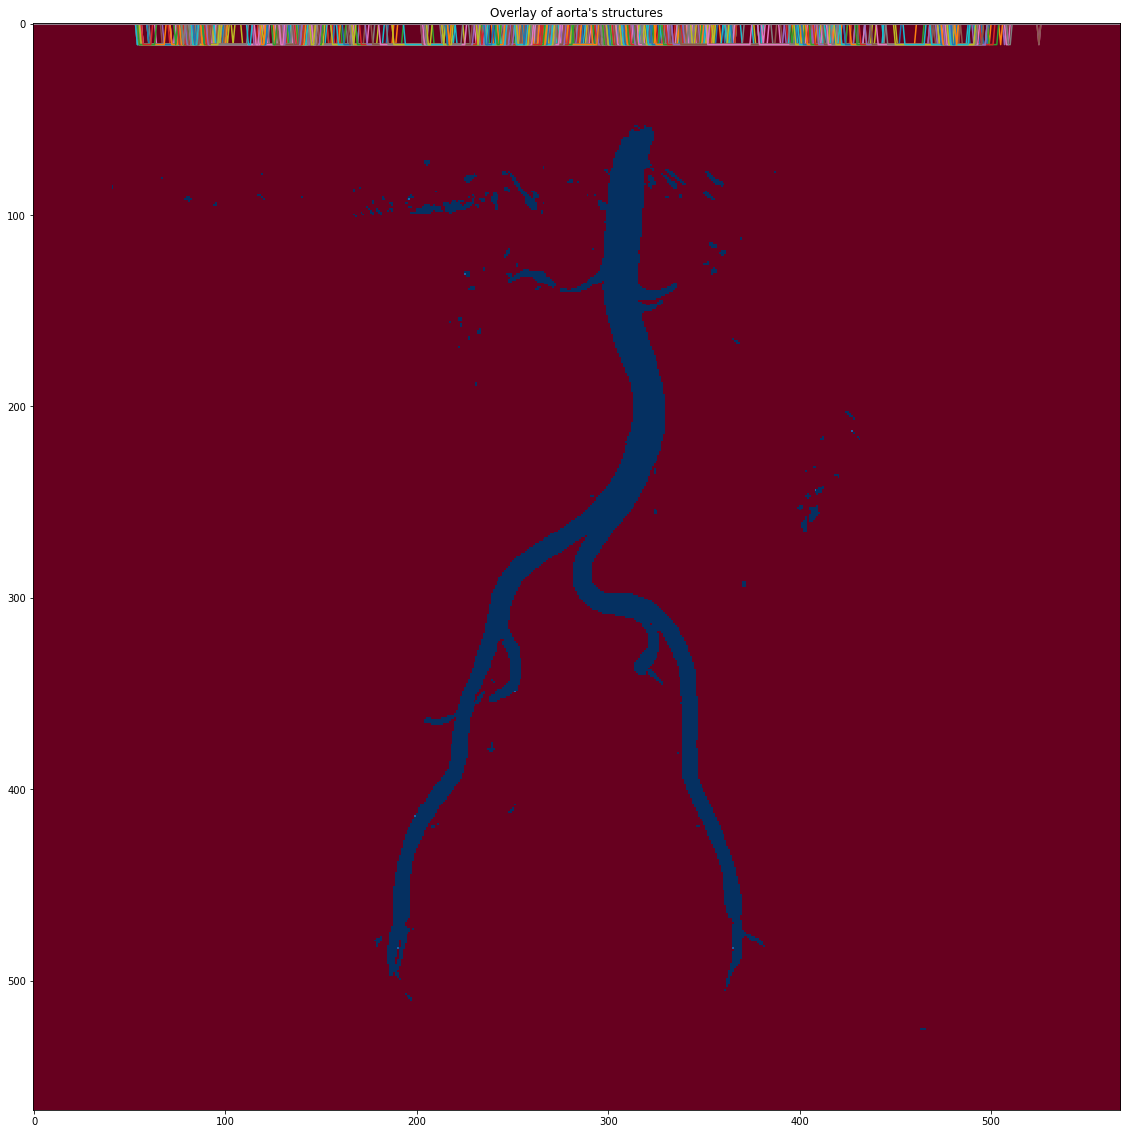

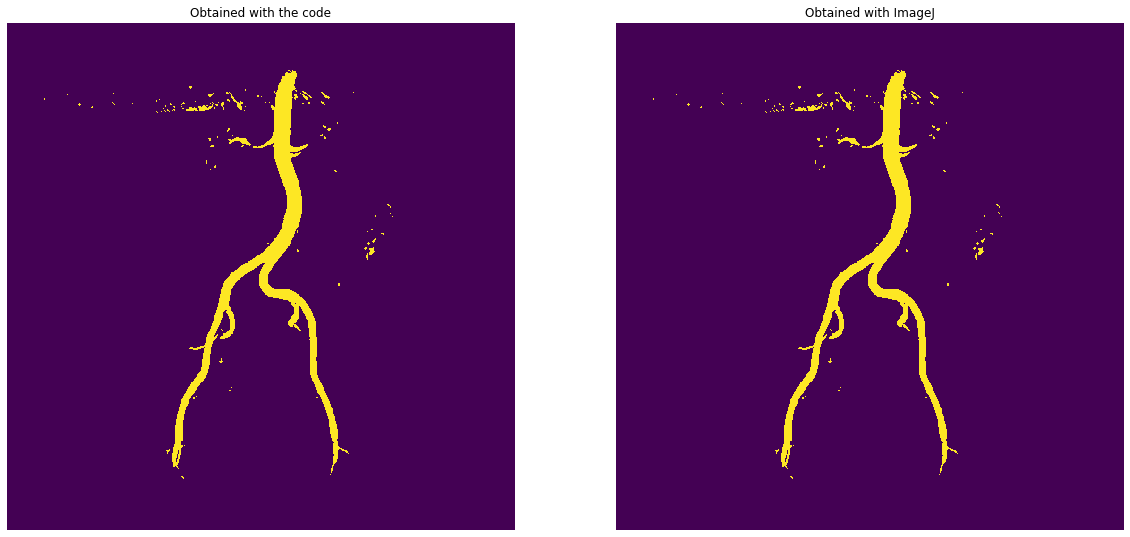

In [190]:
# Comparing the aorta structure from the Kmeans
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(code_aortab,ImageJ_aortab,full=True)
addition=code_aortab+10*ImageJ_aortab
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for aorta's comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-aorta.jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of aorta's structures")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_aorta.jpg'))

fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(code_aortab)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(ImageJ_aortab)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')


(-0.5, 567.5, 567.5, -0.5)

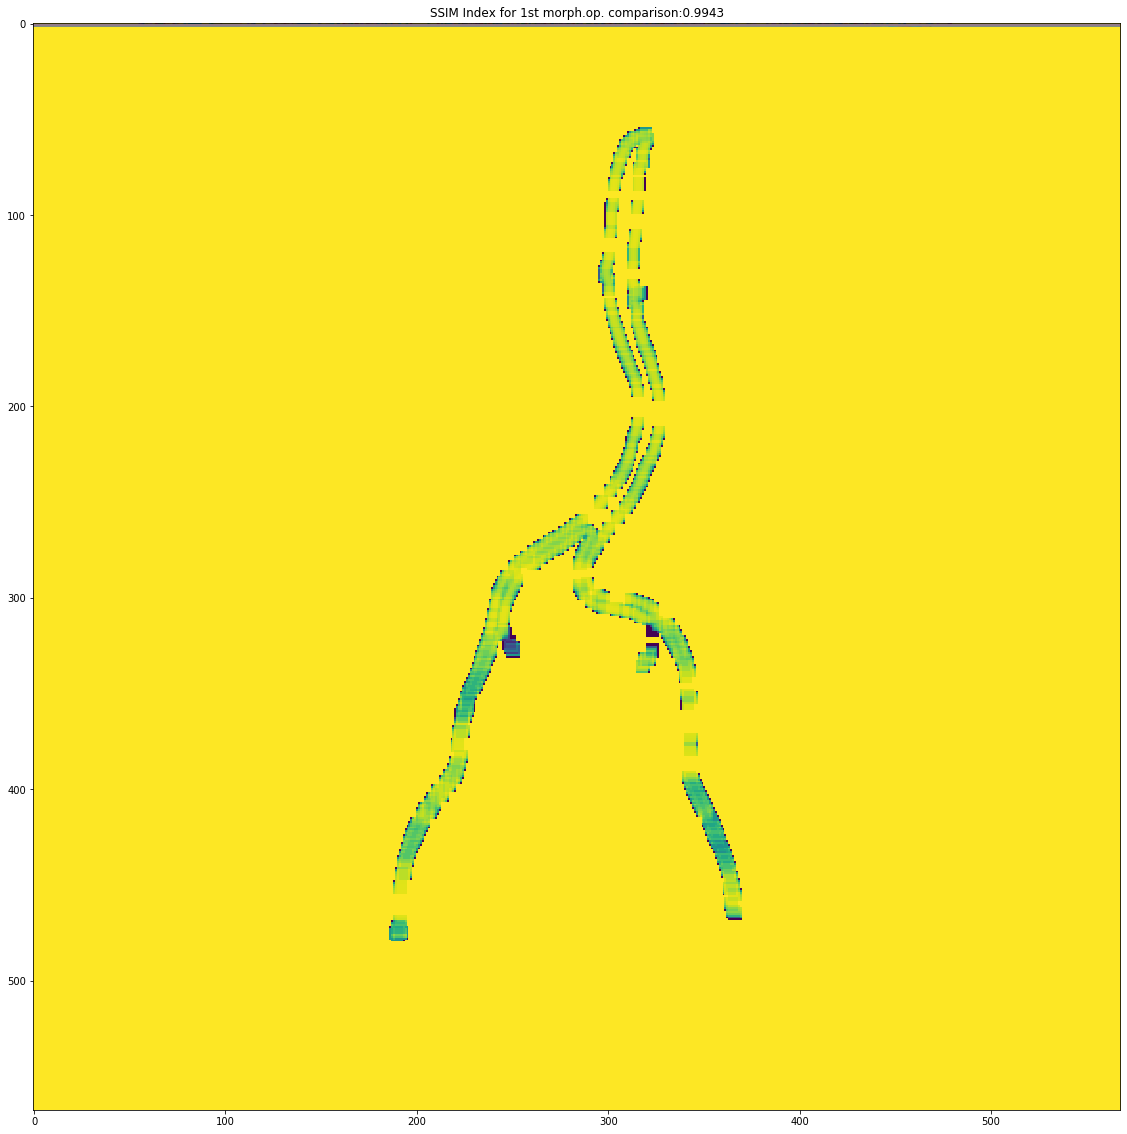

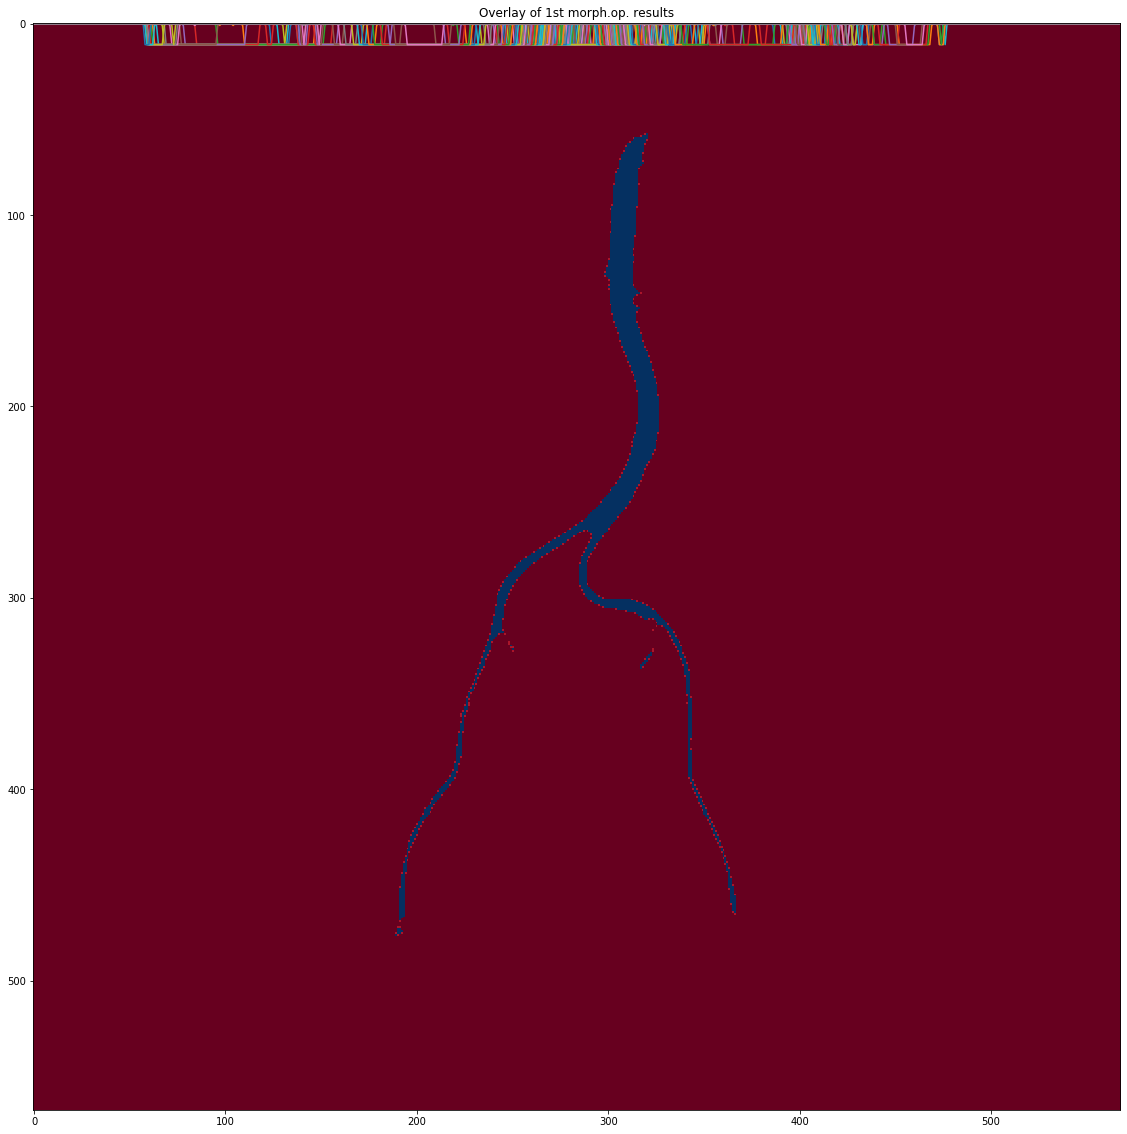

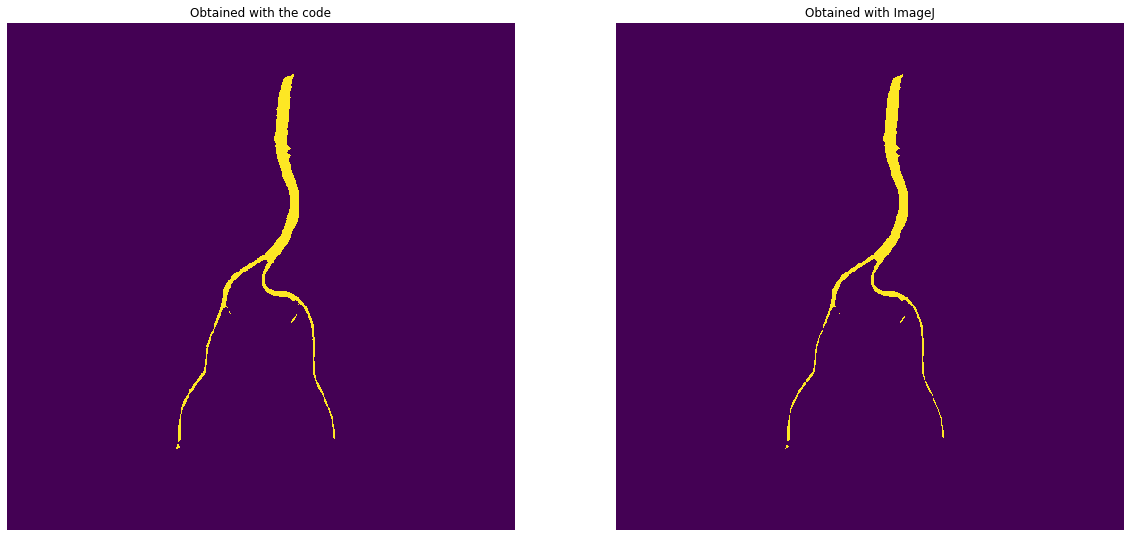

In [189]:
# Comparing the results of the first morphological operation 
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(img11b,img21b,full=True)
addition=img11b+10*img21b
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for 1st morph.op. comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-1st morph.op..jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of 1st morph.op. results")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_1st morph.op..jpg'))

fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img11b)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(img21b)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')


(-0.5, 567.5, 567.5, -0.5)

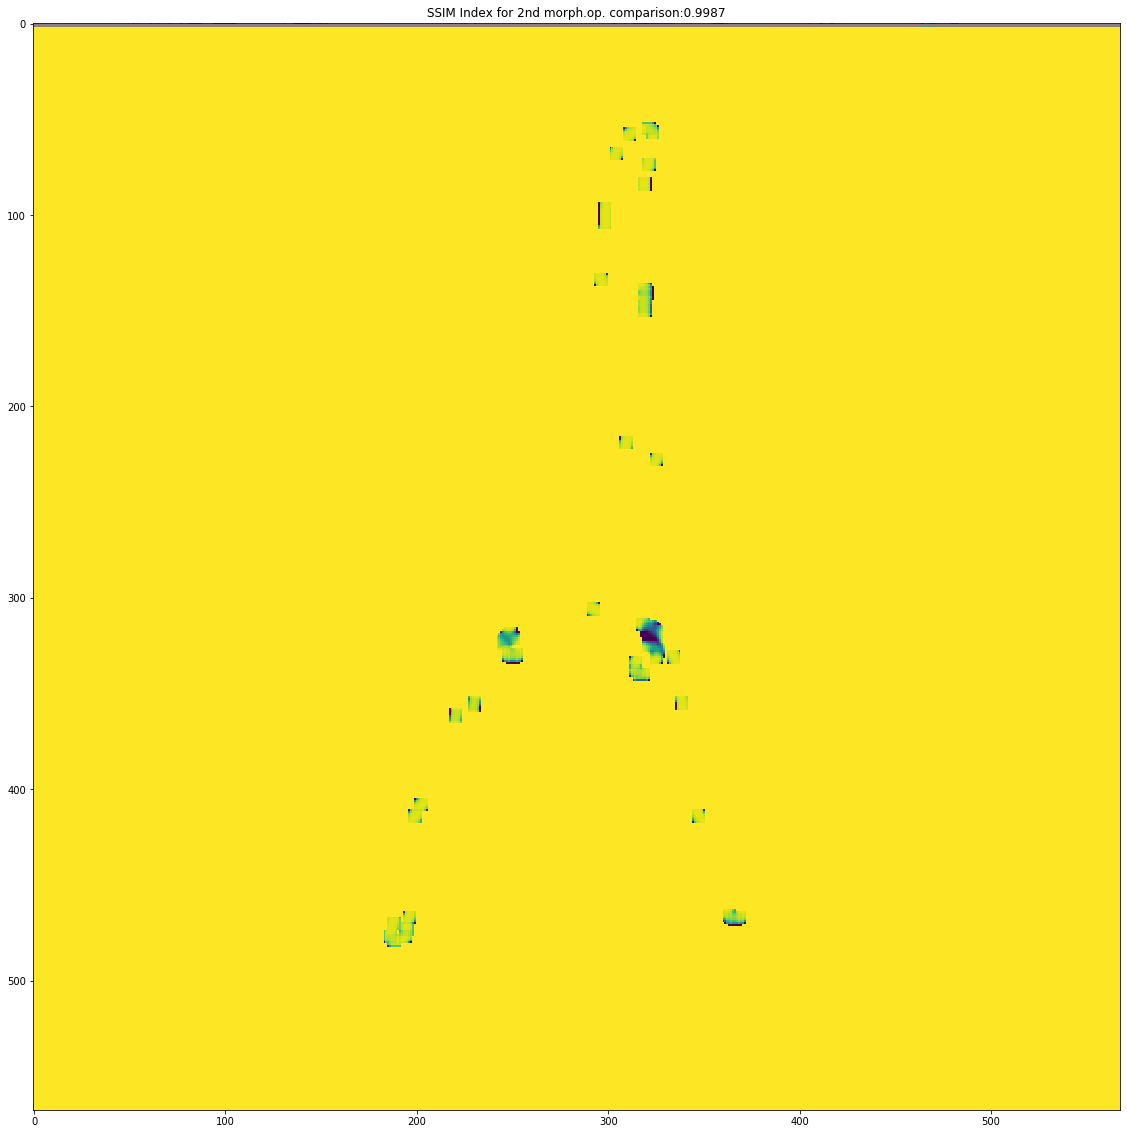

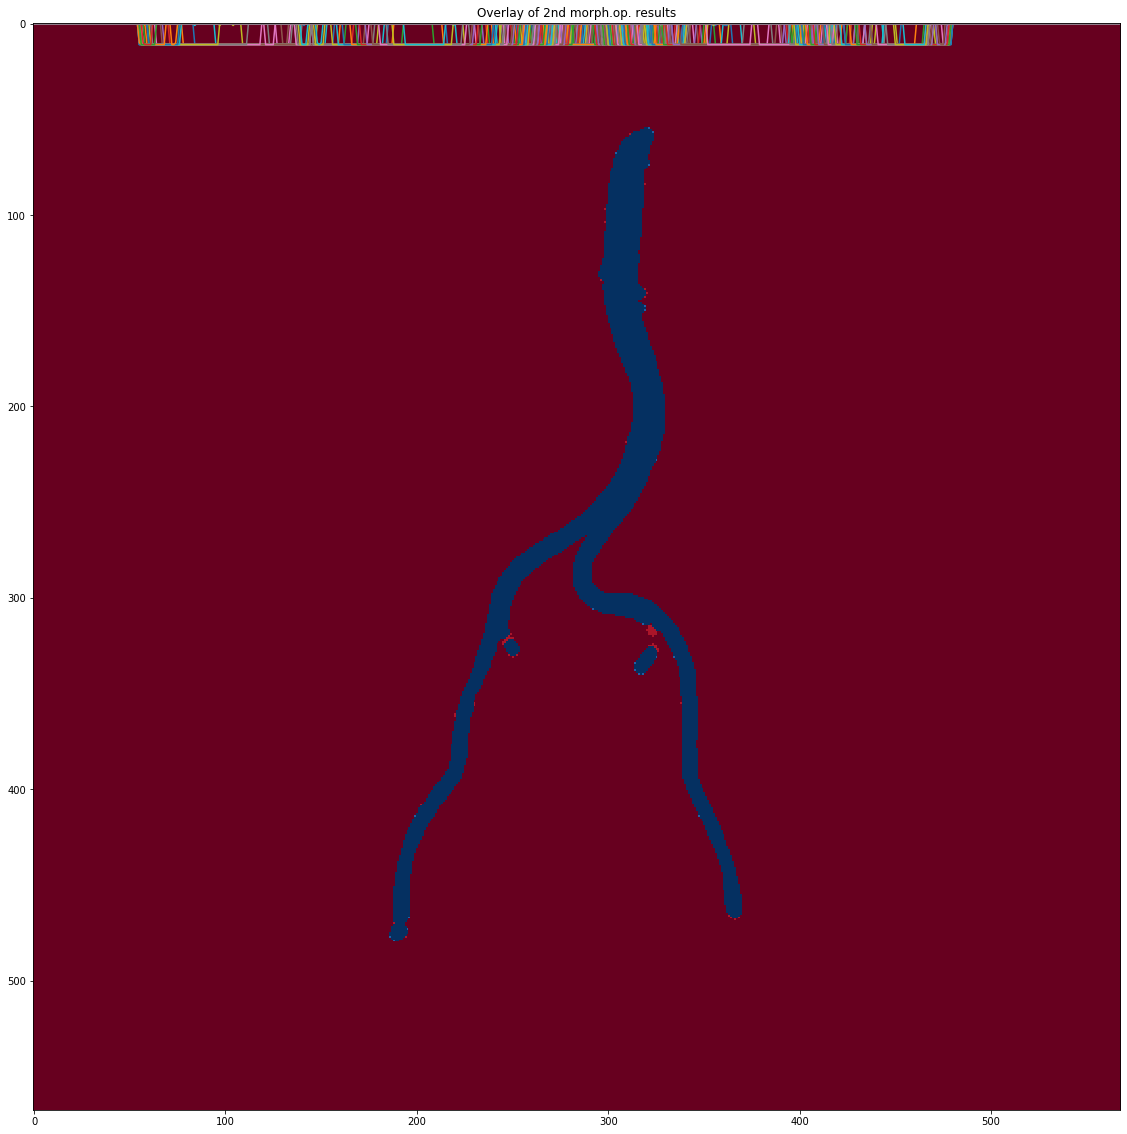

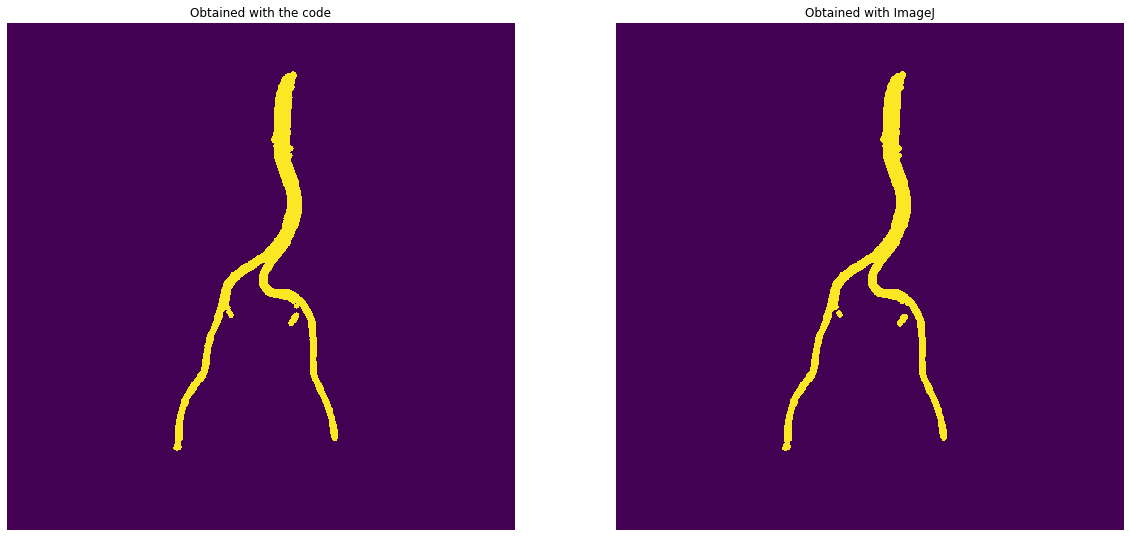

In [188]:
# Comparing the results of the first morphological operation 
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(img12b,img22b,full=True)
addition=img12b+10*img22b
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for 2nd morph.op. comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-2nd morph.op..jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of 2nd morph.op. results")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_2nd morph.op..jpg'))

fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img12b)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(img22b)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')


(-0.5, 567.5, 567.5, -0.5)

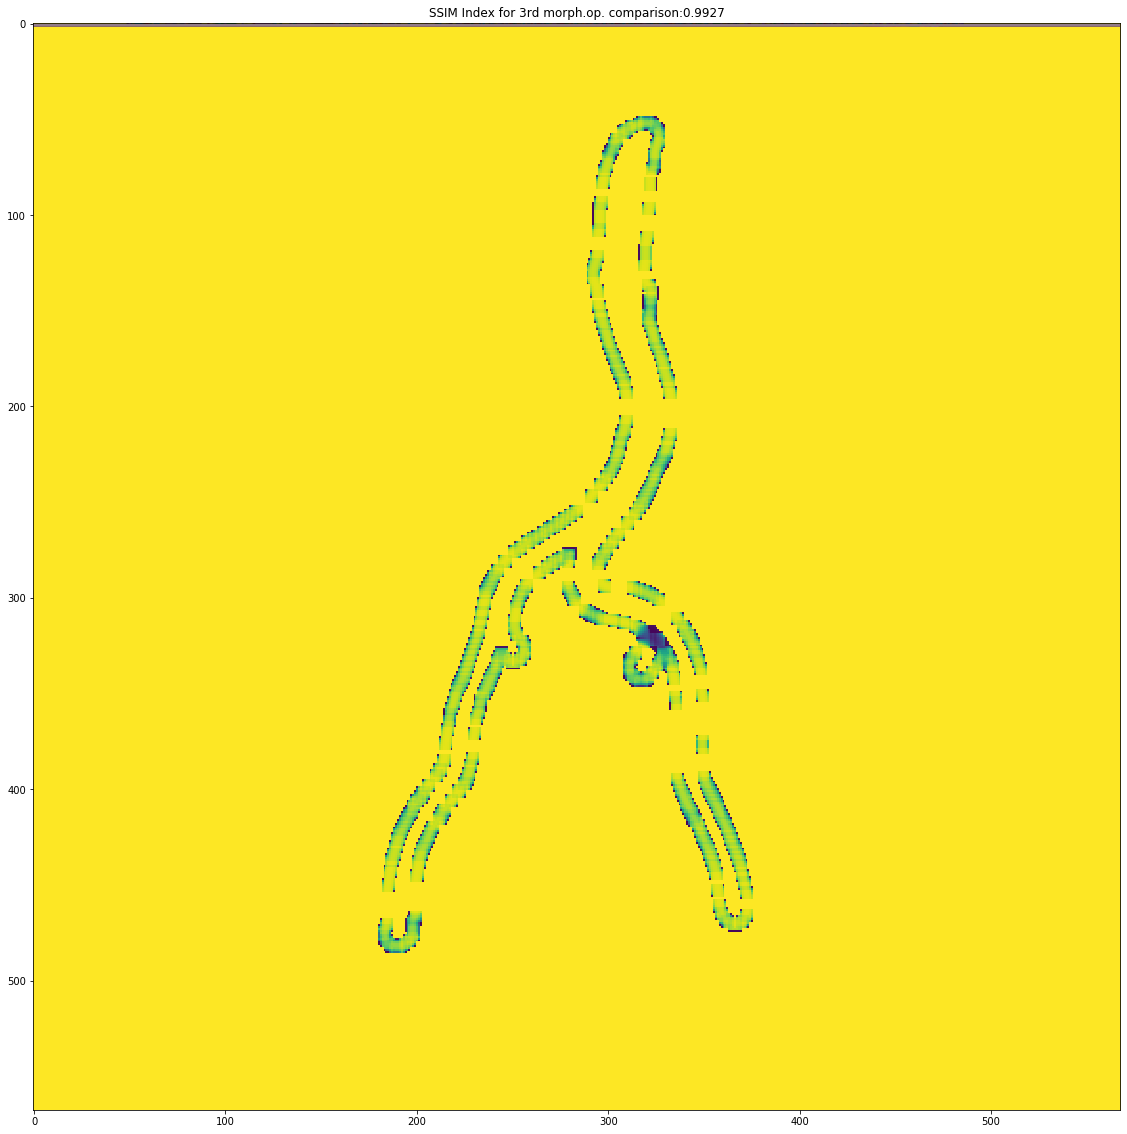

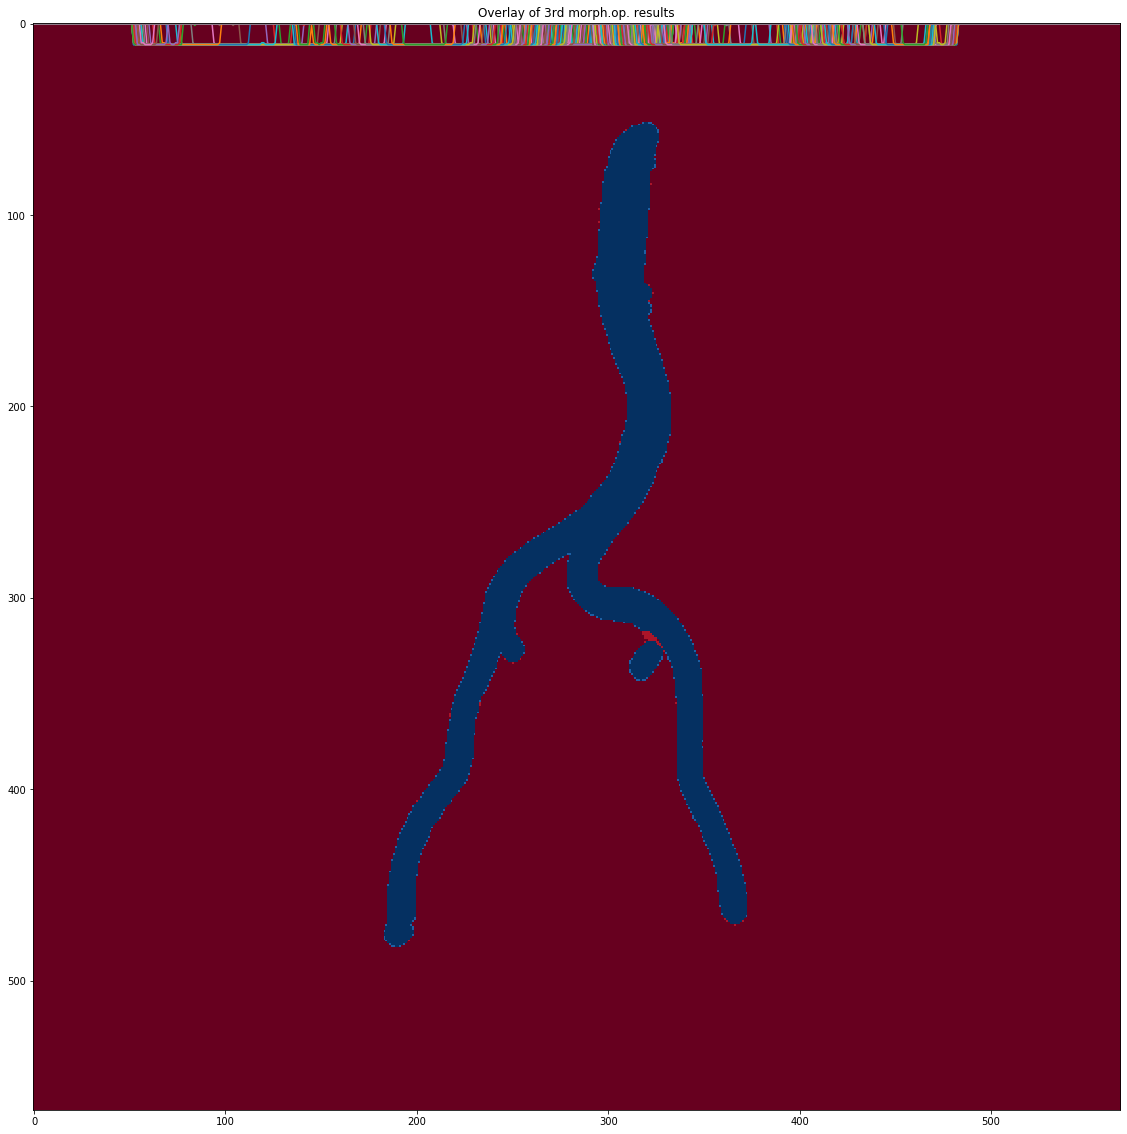

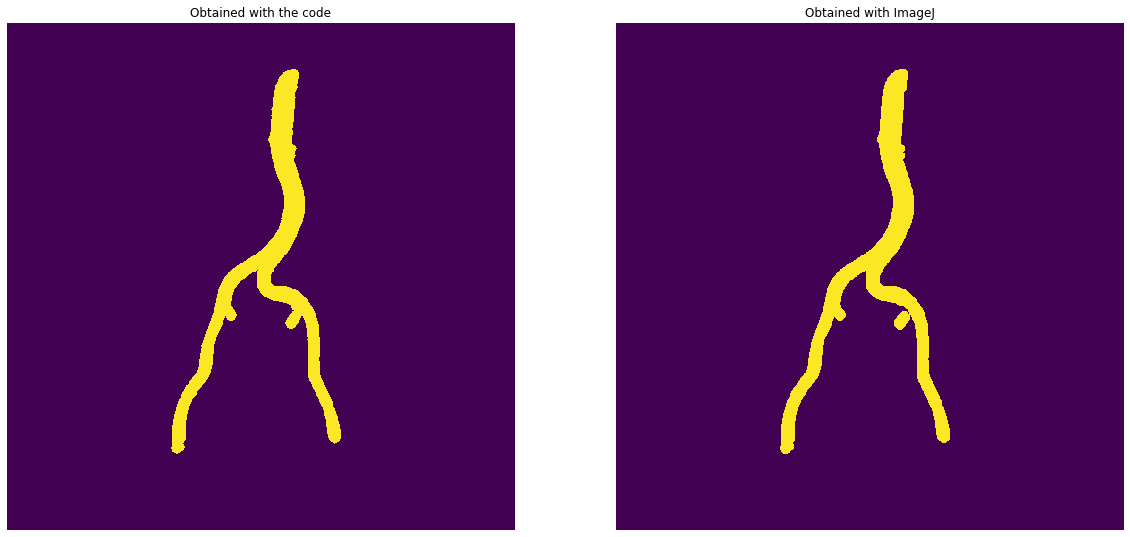

In [192]:
# Comparing the results of the first morphological operation 
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(img13b,img23b,full=True)
addition=img13b+10*img23b
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for 3rd morph.op. comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-3rd morph.op..jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of 3rd morph.op. results")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_3rd morph.op..jpg'))

fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img13b)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(img23b)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')



(-0.5, 567.5, 567.5, -0.5)

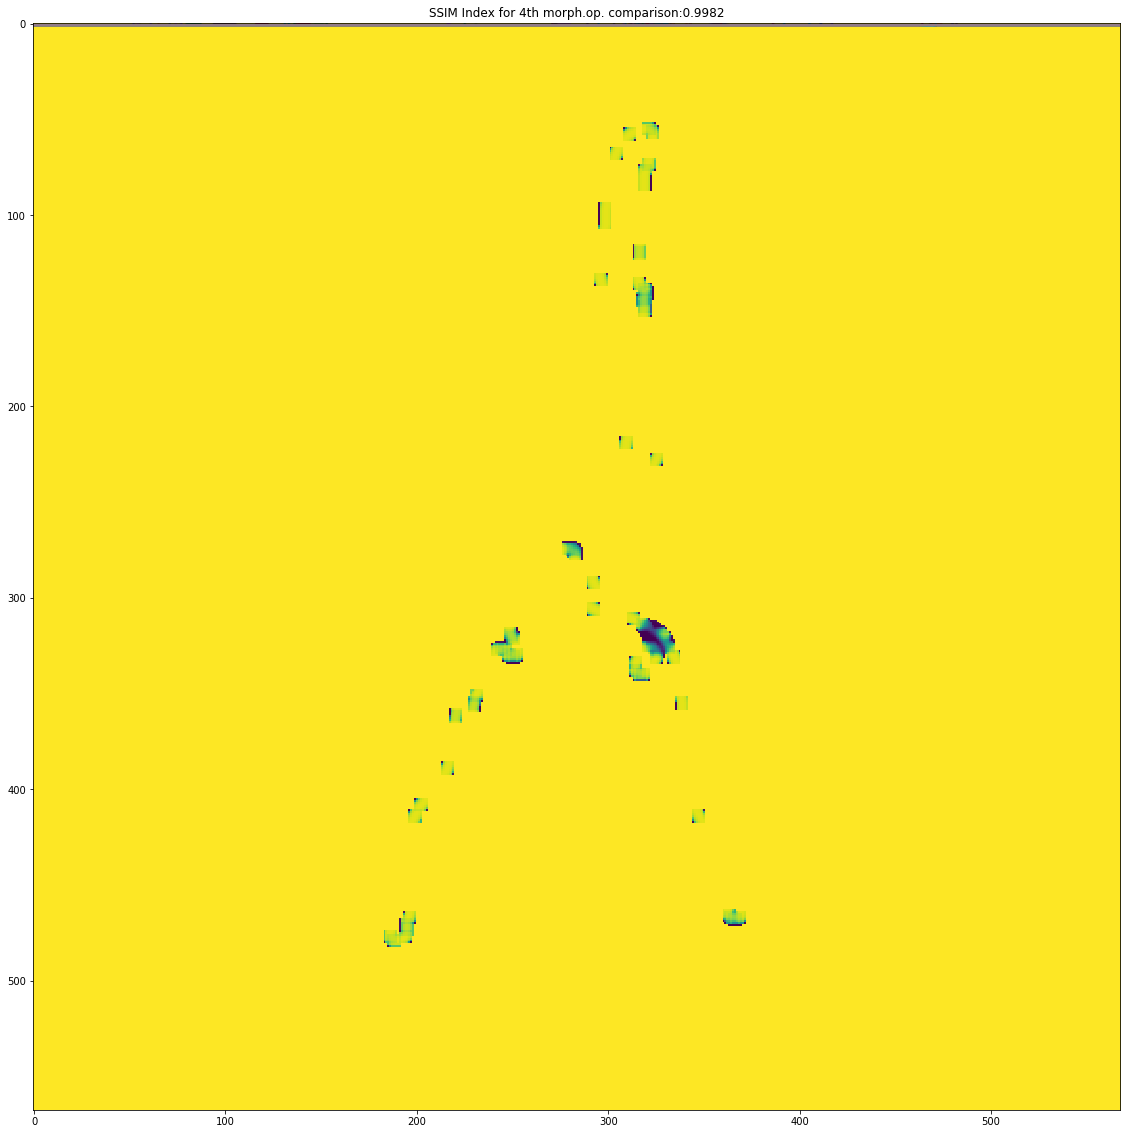

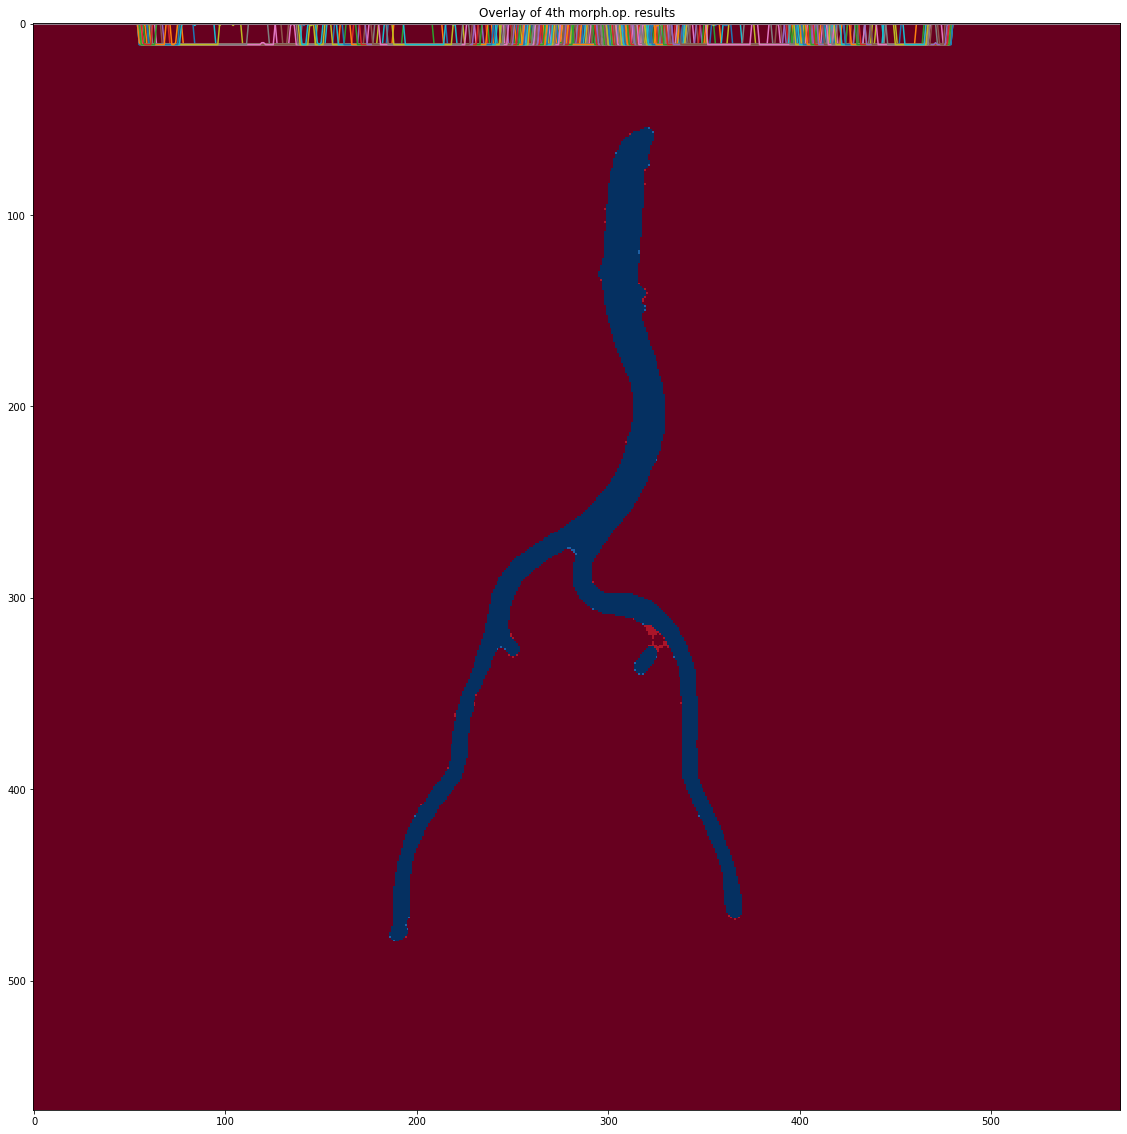

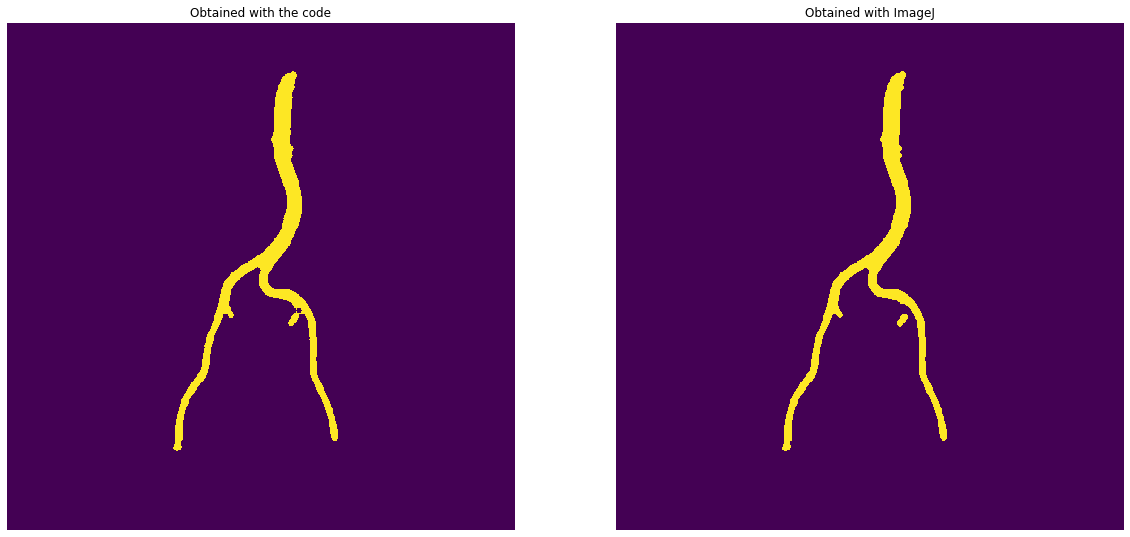

In [193]:
# Comparing the results of the first morphological operation 
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(img14b,img24b,full=True)
addition=img14b+10*img24b
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for 4th morph.op. comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-4th morph.op..jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of 4th morph.op. results")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_4th morph.op..jpg'))


fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img14b)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(img24b)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')


(-0.5, 567.5, 567.5, -0.5)

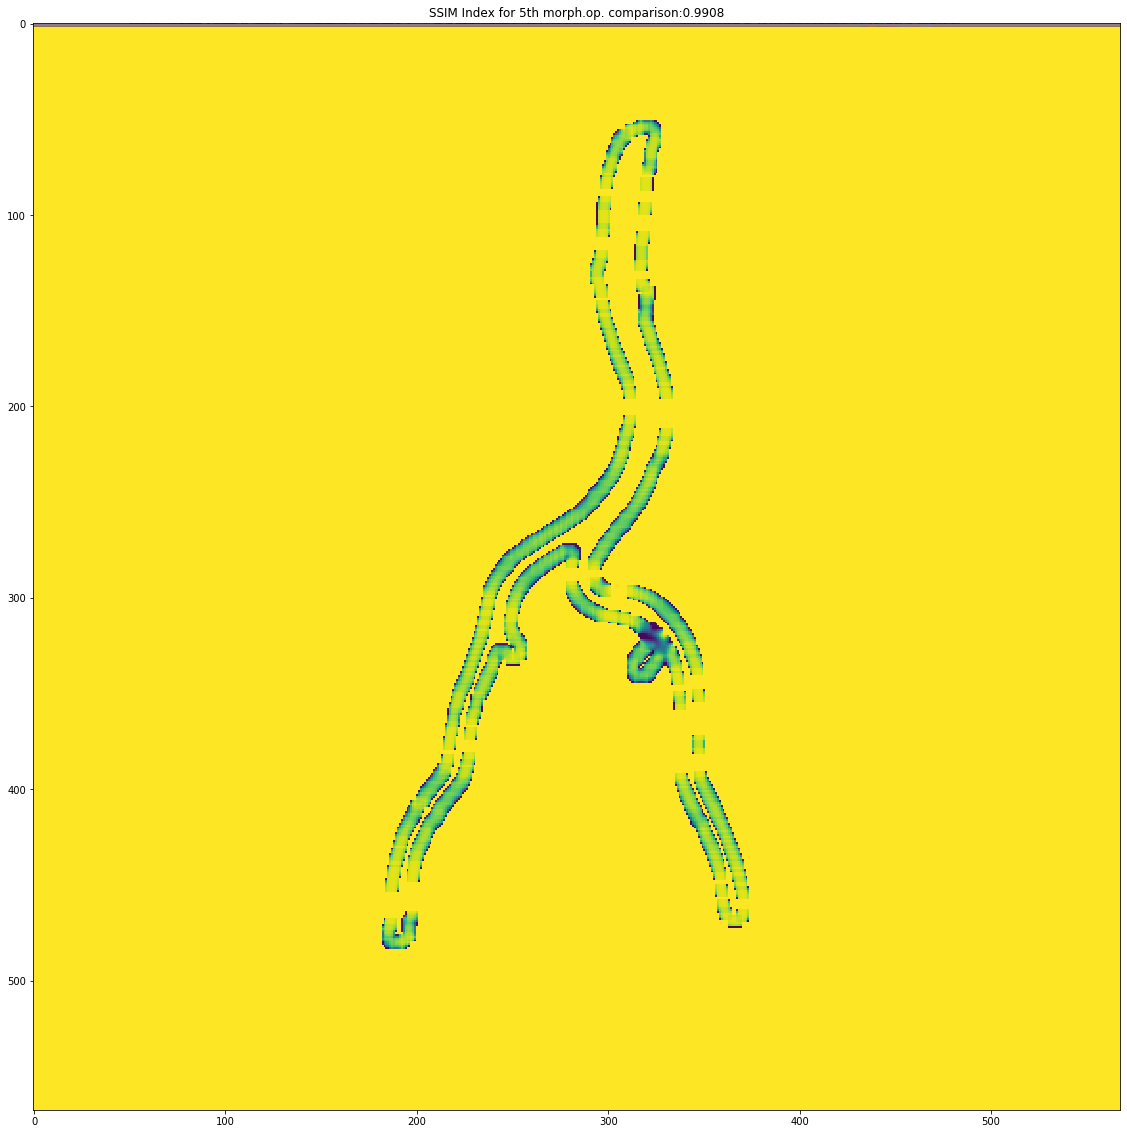

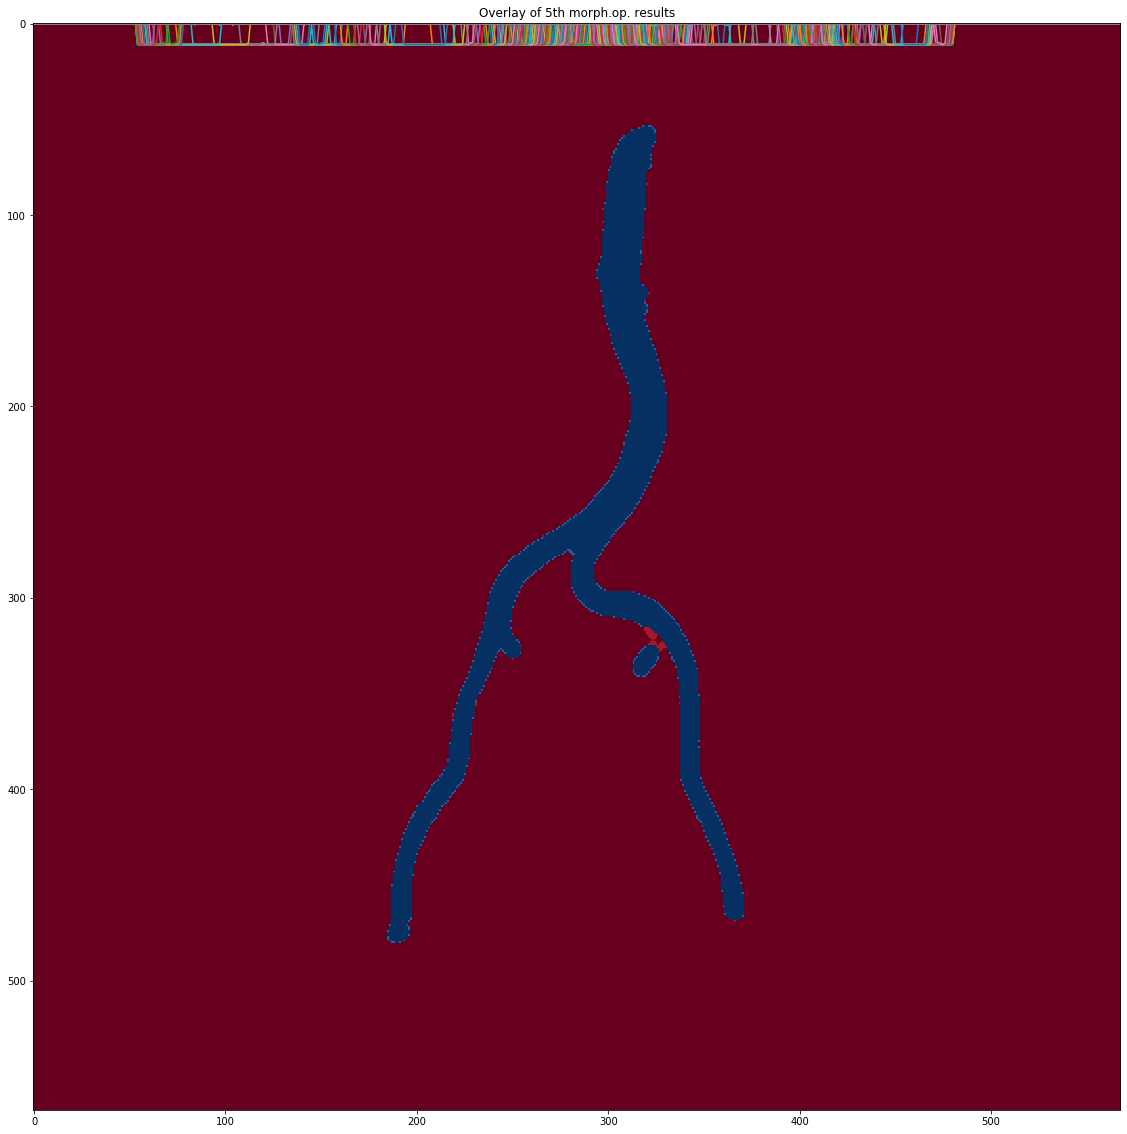

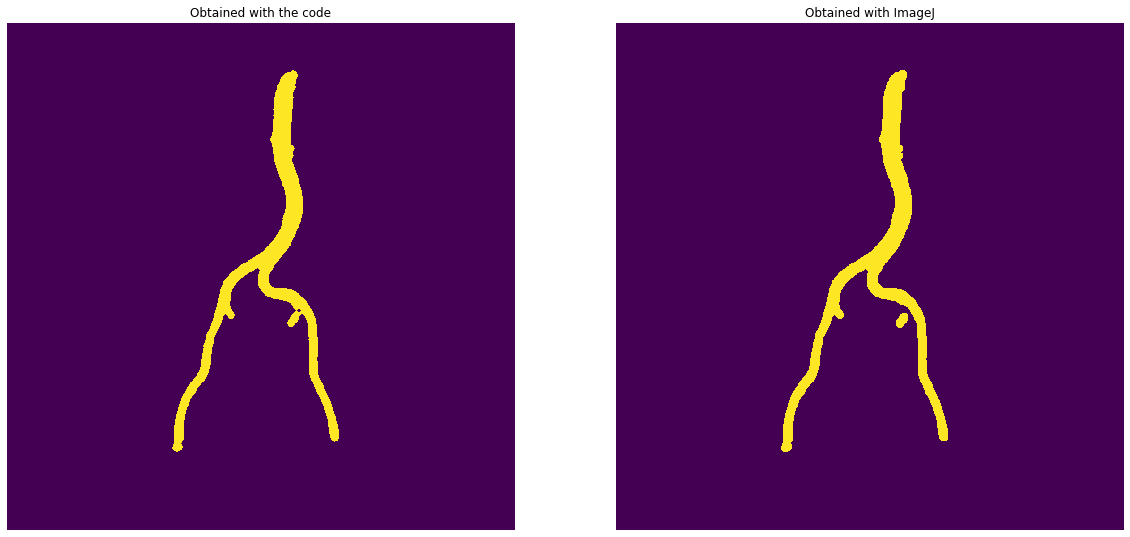

In [194]:
# Comparing the results of the first morphological operation 
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(img15b,img25b,full=True)
addition=img15b+10*img25b
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for 5th morph.op. comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-5th morph.op..jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of 5th morph.op. results")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_5th morph.op..jpg'))


fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img15b)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(img25b)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')




(-0.5, 567.5, 567.5, -0.5)

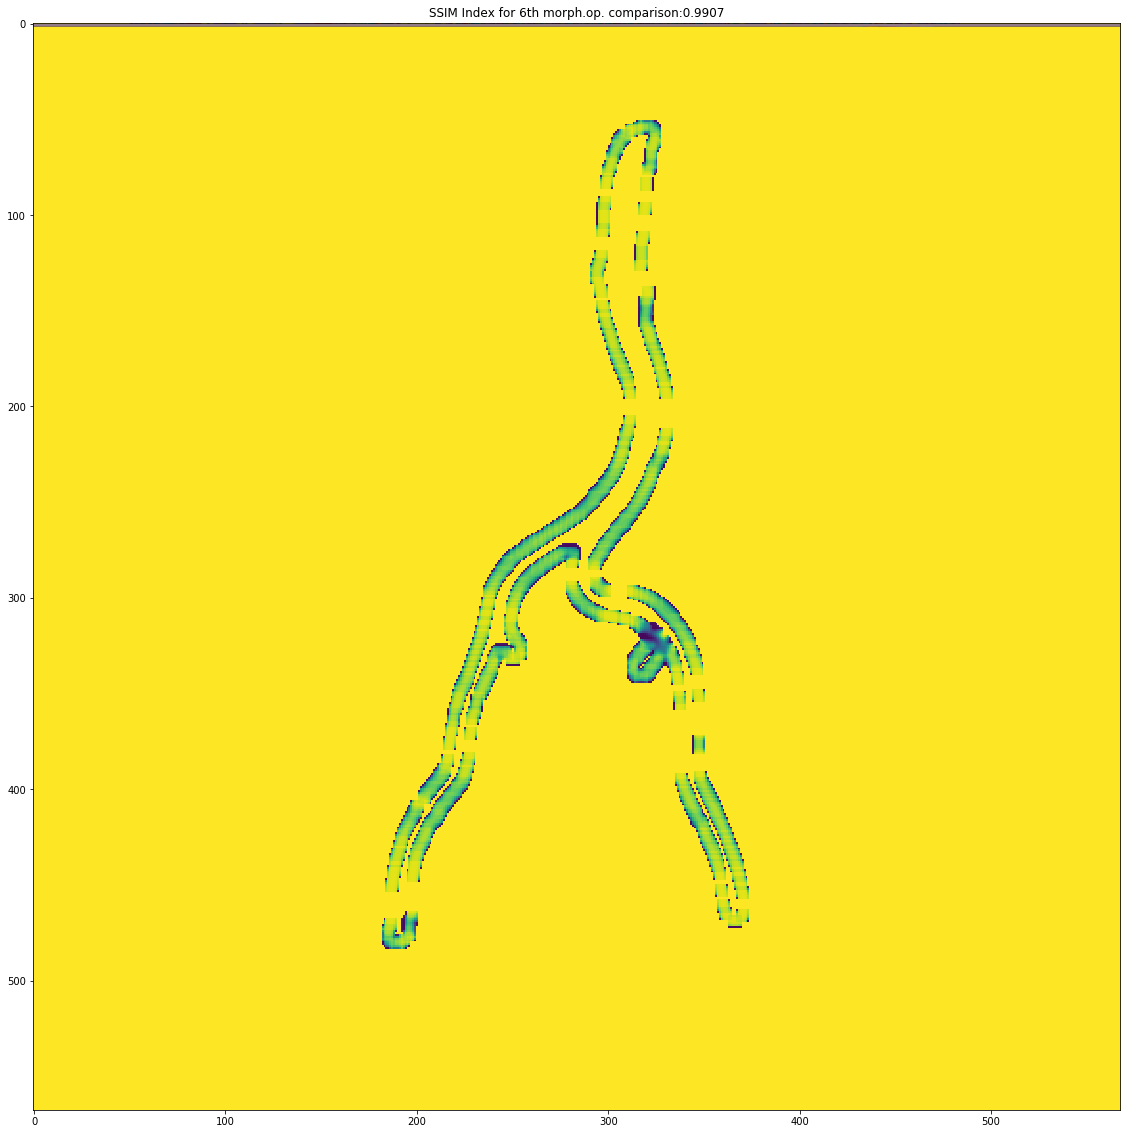

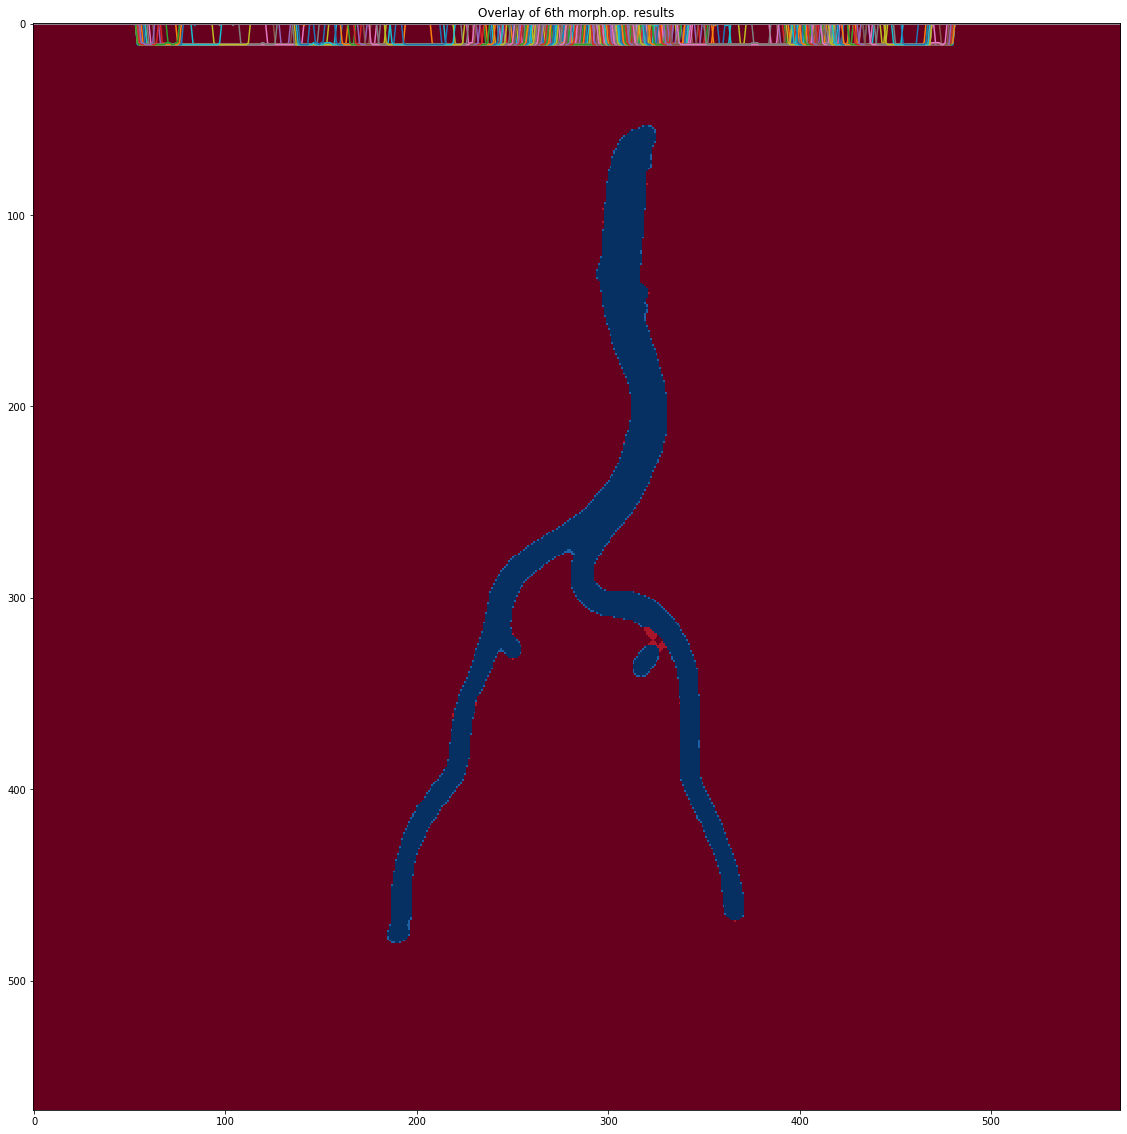

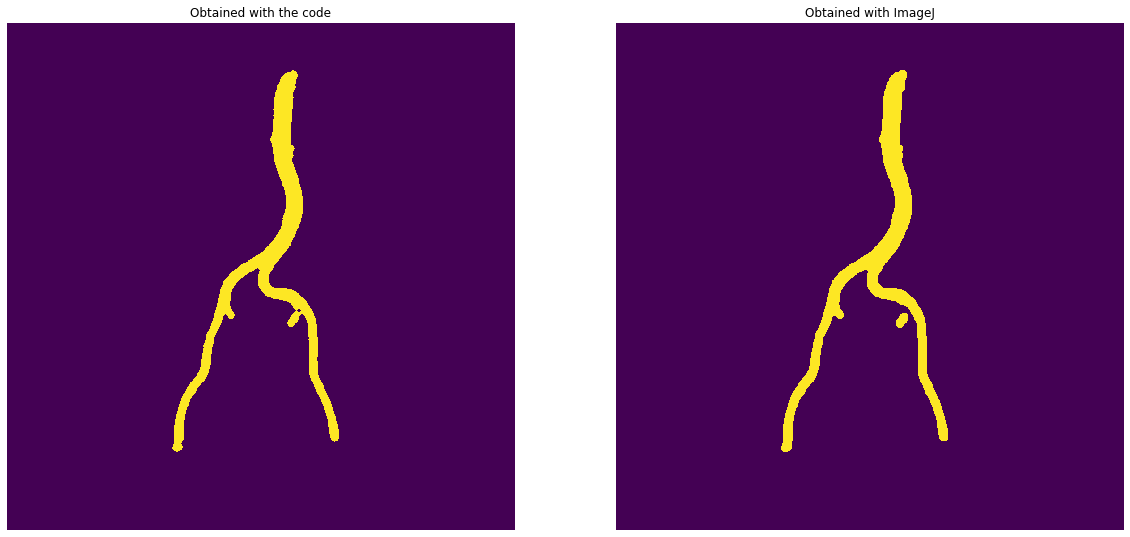

In [195]:
# Comparing the results of the first morphological operation 
%matplotlib inline
(ssim_index,dif_ssim,)=ssim(img16b,img26b,full=True)
addition=img16b+10*img26b
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title("SSIM Index for 6th morph.op. comparison:{}".format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-6th morph.op..jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(addition)
plt.title("Overlay of 6th morph.op. results")
plt.imshow(addition,cmap='RdBu')
fig2.savefig(os.path.join(data_path,'dif_6th morph.op..jpg'))


fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img16b)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(img26b)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')




(-0.5, 567.5, 567.5, -0.5)

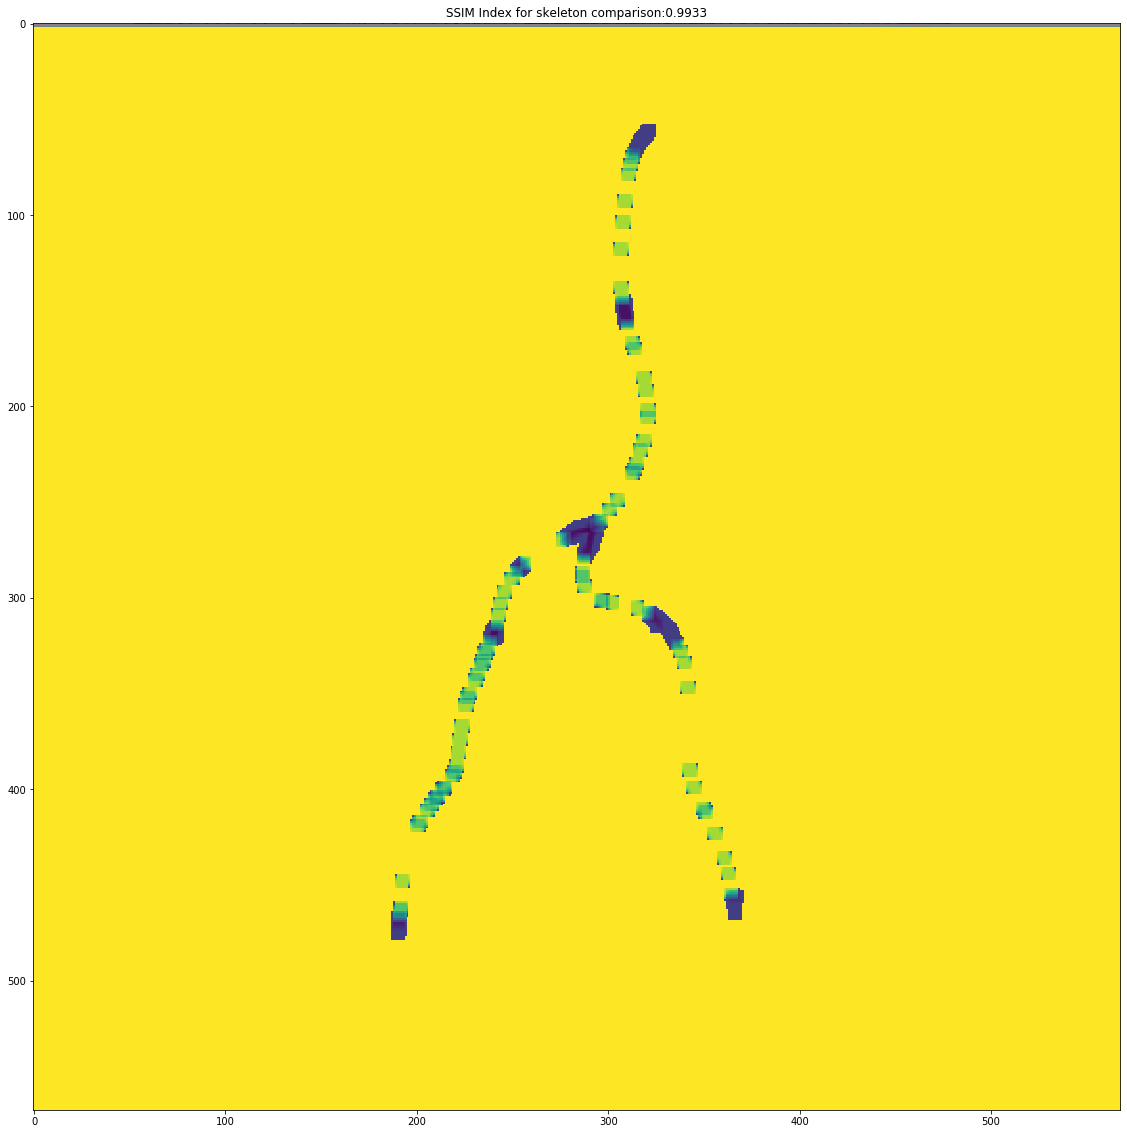

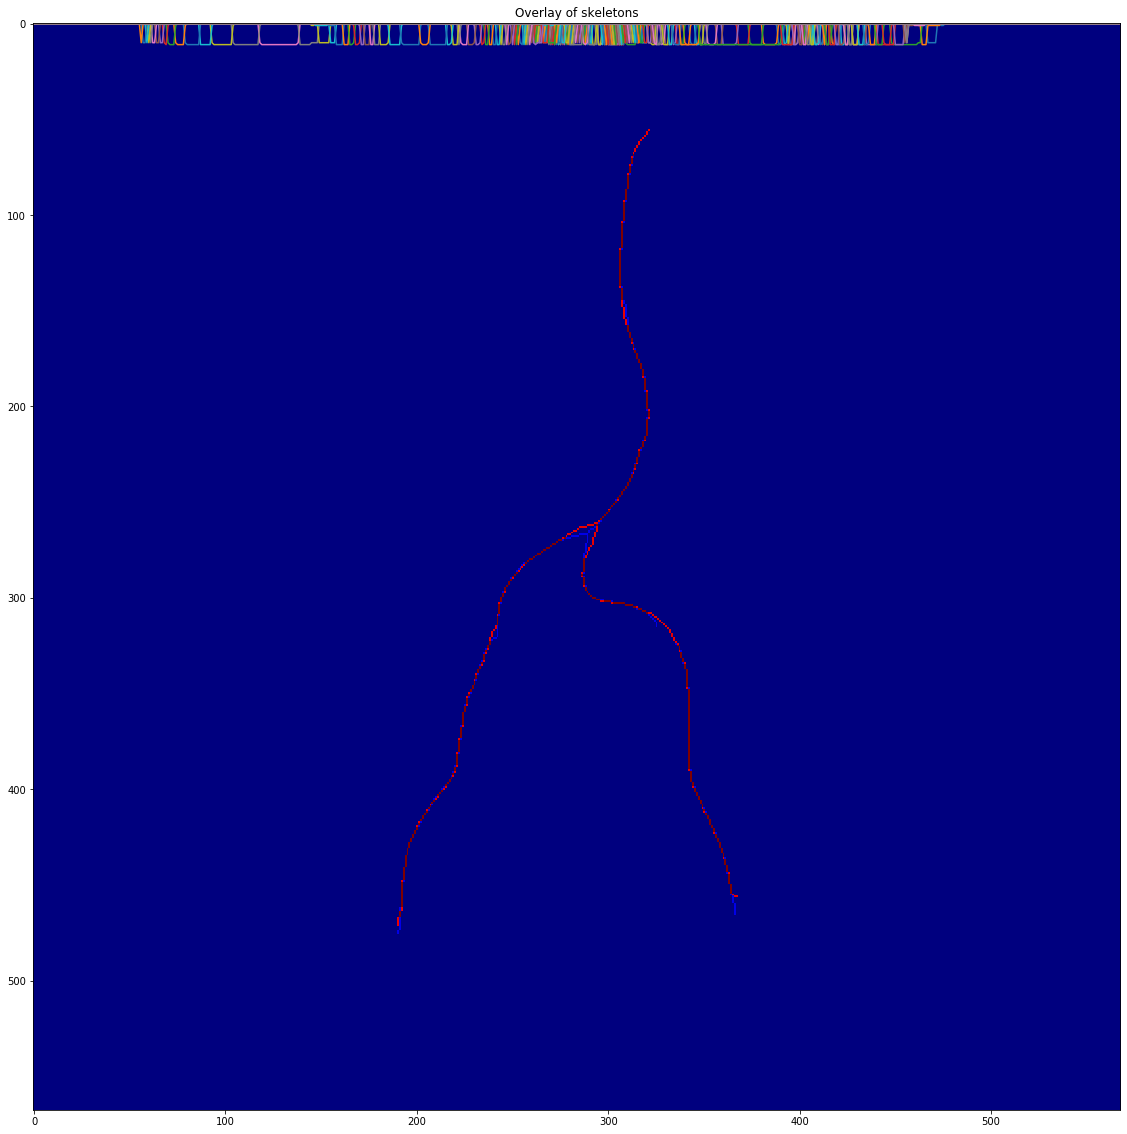

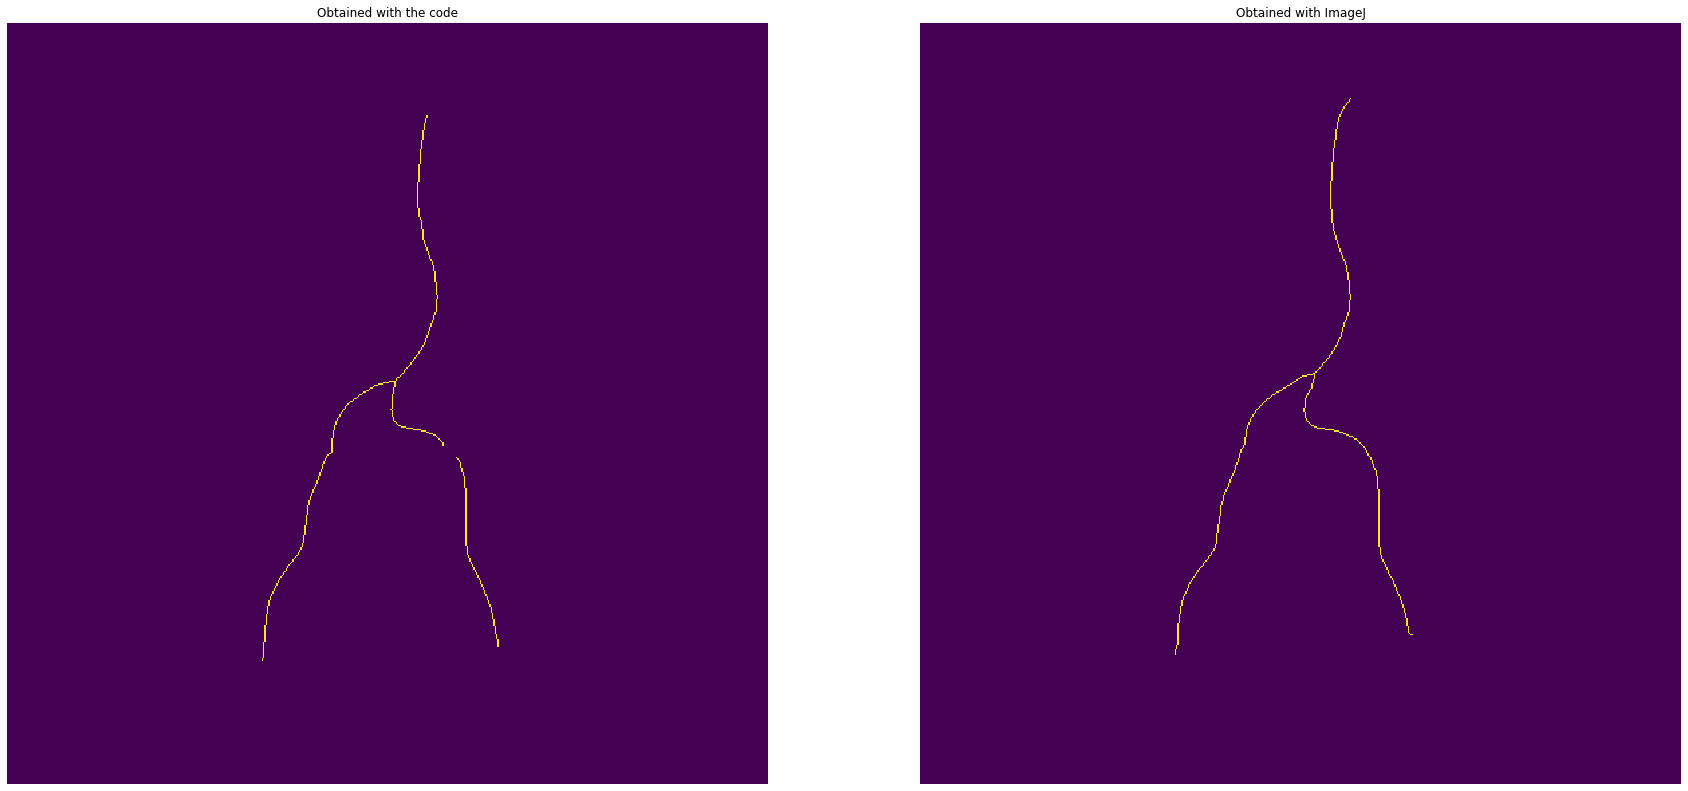

In [197]:
# Comparing final skeletons

%matplotlib inline
(ssim_index,dif_ssim,)=ssim(code_skeletonb,ImageJ_skeletonb,full=True)
dif_skeletons=code_skeletonb+10*ImageJ_skeletonb
#cv2.imwrite(os.path.join(data_path,'dif_ssim-skeletons.jpg'),dif_ssim*255)
#cv2.imwrite(os.path.join(data_path,'dif_skeletons.jpg'),dif_skeletons*255)


fig1=plt.figure(figsize=(20,20))
plt.plot(dif_ssim)
plt.title('SSIM Index for skeleton comparison:{}'.format(round(ssim_index,4)))
plt.imshow(dif_ssim)
fig1.savefig(os.path.join(data_path,'dif_ssim-skeletons.jpg'))

fig2=plt.figure(figsize=(20,20))
plt.plot(dif_skeletons)
plt.title('Overlay of skeletons')
plt.imshow(dif_skeletons,cmap='jet')
fig2.savefig(os.path.join(data_path,'dif_skeletons.jpg'))

fig3,(ax1,ax2)=plt.subplots(1,2,figsize=(30,30))
ax1.imshow(code_skeletonb)
ax1.set_title('Obtained with the code')
ax1.axis('Off')
ax2.imshow(ImageJ_skeletonb)
ax2.set_title('Obtained with ImageJ')
ax2.axis('Off')



It seems that the differences between both structures appear during morphological operation and that they do not concentrate especialy on one operation.

However, focusing research on the bifurcation point of the infrarenal aortic artery, it is seen that the small differences that occur during each operation end up creating a relevant diference in the final structures of the skeleton 